<a href="https://colab.research.google.com/github/urvashiramdasani/ML-DL-Python/blob/master/DL/18BCE247_DL1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Urvashi Ramdasani

Division : EL3

Aim : 

In [23]:
# Load the libraries

import pickle
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
!pip install patool

     |████████████████████████████████| 81kB 5.1MB/s 


In [10]:
import patoolib      # For extracting .pkl file 

patoolib.extract_archive("mnist.rar", outdir="/content")

patool: Extracting mnist.rar ...
patool: running /usr/bin/unrar x -- /content/mnist.rar
patool:     with cwd='/content'
patool: ... mnist.rar extracted to `/content'.


'/content'

In [12]:
# Load the data

data = open('mnist.pkl', 'rb')
train, validation, test = pickle.load(data, encoding = 'latin1')

In [13]:
# Splitting input and output variables

X_train = train[0]
y_train = train[1]
X_test = test[0]
y_test = test[1]
X_val = validation[0]
y_val = validation[1]

In [14]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape)

(50000, 784) (50000,) (10000, 784) (10000,) (10000, 784) (10000,)


In [15]:
# Combining train set and validation set images

X_train = np.concatenate((X_train, X_val), axis = 0)
y_train = np.concatenate((y_train, y_val), axis = 0)
print(X_train.shape, y_train.shape)

(60000, 784) (60000,)


In [33]:
# Train the data

clf = MLPClassifier(hidden_layer_sizes = (784,), max_iter = 10, solver = 'adam', learning_rate_init = 0.1)
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(784,), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=10, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [34]:
# Predictions

y_predict = clf.predict(X_test)
print(y_predict)

[7 2 1 ... 4 5 6]


In [35]:
# Performance Measures

print('Accuracy Score : ', metrics.accuracy_score(y_true = y_test, y_pred = y_predict))
print('Classification Report : ')
print(metrics.classification_report(y_true = y_test, y_pred = y_predict))

Accuracy Score :  0.894
Classification Report : 
              precision    recall  f1-score   support

           0       0.99      0.84      0.91       980
           1       1.00      0.94      0.97      1135
           2       0.94      0.92      0.93      1032
           3       0.81      0.90      0.85      1010
           4       0.92      0.93      0.92       982
           5       0.94      0.86      0.90       892
           6       0.96      0.91      0.93       958
           7       0.98      0.79      0.88      1028
           8       0.65      0.95      0.77       974
           9       0.90      0.90      0.90      1009

    accuracy                           0.89     10000
   macro avg       0.91      0.89      0.90     10000
weighted avg       0.91      0.89      0.90     10000



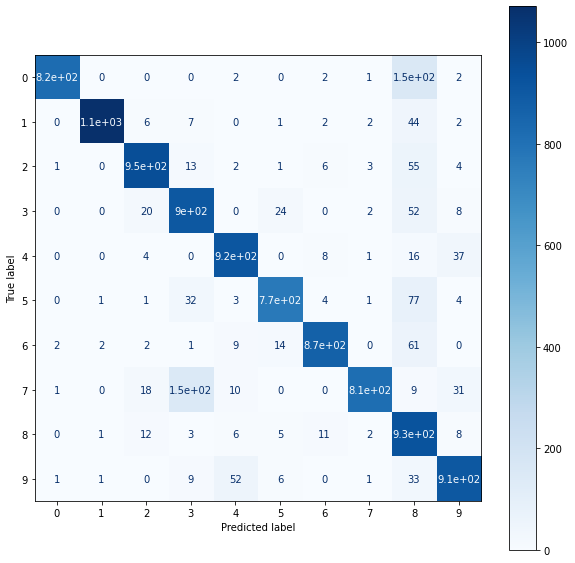

In [36]:
fig, ax = plt.subplots(figsize=(10, 10))
metrics.plot_confusion_matrix(clf, X_test, y_test, ax = ax, cmap=plt.cm.Blues)